# Patch Visualization

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.patches as patches
import matplotlib.pyplot as plt
from lightning import seed_everything

from htc.models.data.run_size_dataset import label_mapping_dataset_size
from htc.models.image.DatasetImage import DatasetImage
from htc.models.patch.DatasetPatchStream import DatasetPatchStream
from htc.settings_seg import settings_seg
from htc.tivita.DataPath import DataPath
from htc.utils.Config import Config

In [2]:
def patch_plot(image_name: str, patch_size: int, mapping: dict = None) -> None:
    seed_everything(0, workers=True)

    if mapping is None:
        mapping = settings_seg.label_mapping

    config = Config(
        {
            "input/patch_size": [patch_size, patch_size],
            "input/n_channels": 3,
            "input/patch_sampling": "all_valid",
            "dataloader_kwargs/num_workers": 1,
            "dataloader_kwargs/batch_size": 1,
            "label_mapping": mapping,
        }
    )
    paths = [DataPath.from_image_name(image_name)]
    dataset = DatasetPatchStream(paths, train=False, config=config, single_pass=True)
    image = DatasetImage(paths, train=False, config=config)[0]["features"]

    fig, ax = plt.subplots(figsize=(8, 10))
    ax.imshow(image)

    for sample in dataset.iter_samples(include_position=True):
        rect = patches.Rectangle(
            (sample["center_col"] - dataset.patch_size_half, sample["center_row"] - dataset.patch_size_half),
            dataset.patch_size,
            dataset.patch_size,
            facecolor="green",
            alpha=0.2,
        )
        ax.add_patch(rect)

Global seed set to 0


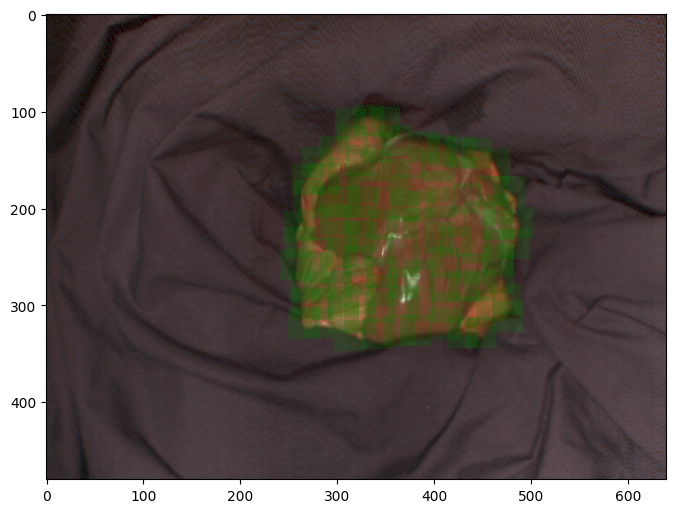

In [3]:
patch_plot("P043#2019_12_20_12_38_35", patch_size=32)

Global seed set to 0


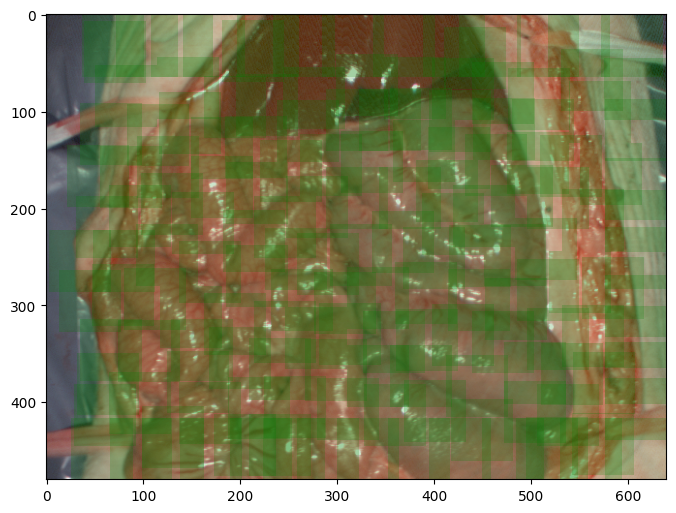

In [4]:
patch_plot("P044#2020_02_01_09_51_31", patch_size=64)

Global seed set to 0


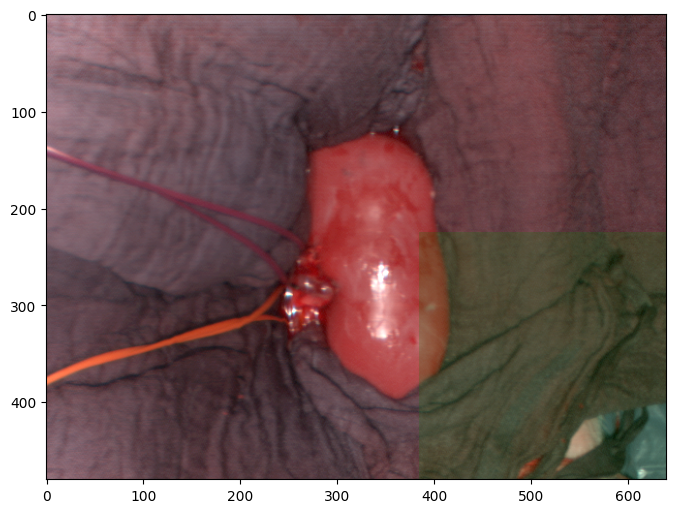

In [5]:
# patch shifts to the image borders
patch_plot("P081#2021_02_23_19_44_36", patch_size=256)

# Special Mapping

Global seed set to 0


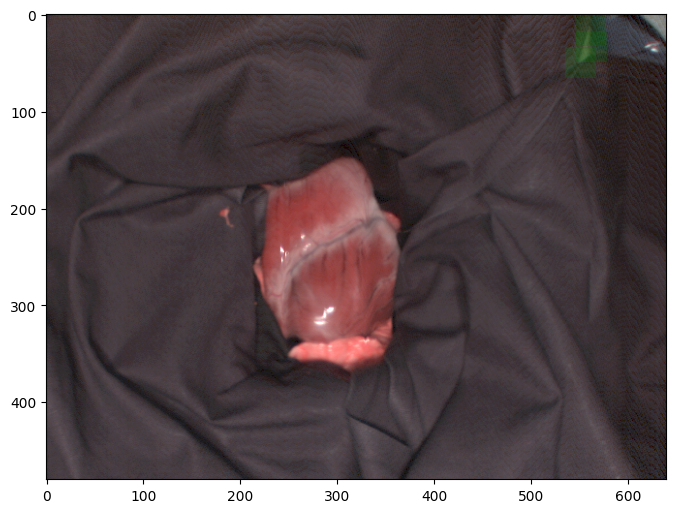

In [6]:
patch_plot("P044#2020_02_01_17_38_45", patch_size=32, mapping=label_mapping_dataset_size())